# Imports

In [1]:
import pyarrow as pa
import pyarrow.parquet as pq

import pandas as pd

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import numpy as np

from scipy.stats import pearsonr, spearmanr

import geopandas as gpd #heatmap
import plotly.graph_objects as go

# Data loading

### BTC data

In [2]:
btc_price_data = pd.read_csv("data/BTC_ALL_graph_coinmarketcap.csv",sep=";")

#split off time of day
btc_price_data["timestamp"] = btc_price_data["timestamp"].apply(lambda x: str(x).split("T")[0]) 
btc_price_data = btc_price_data[["high", "timestamp"]]
btc_price_data.rename(columns={"timestamp": "date"}, inplace=True)


btc_price_data["year"] = btc_price_data["date"].apply(lambda x: int(str(x).split("-")[0]))

btc_price_data = btc_price_data[btc_price_data['year'] >= 2011]

display(btc_price_data.tail())

,high,date,year
726,26550.072937,2023-05-04,2023
727,25148.010374,2023-05-11,2023
728,25338.472061,2023-05-17,2023
729,25279.405768,2023-05-24,2023
730,26131.181703,2023-05-30,2023


### Actors data

In [3]:
actors = pq.read_table("data/actors.parquet")
actors_df = actors.to_pandas()

actors_df

,id,uri,label,jurisdictions,categories
0,bilaxy,bilaxy.com,Bilaxy,HK,exchange
1,banxa,banxa.com,Banxa,"AU, NL, US",exchange
2,aax,www.aax.com,Aax,SC,exchange
3,altcointrader,www.altcointrader.co.za,AltcoinTrader,ZA,exchange
4,azbit,azbit.com,Azbit,MH,exchange
...,...,...,...,...,...
309,stocksexchange,stex.com,Stex,EE,exchange
310,smenarnabitcoin,smenarnabitcoin.cz,Smenarnabitcoin,CZ,exchange
311,xapo,xapo.com,Xapo,US,"exchange, service"
312,yobit,yobit.net,YoBit,RU,exchange


### Flow data

In [4]:
flows = pq.read_table("data/flows.parquet")
flows_df = flows.to_pandas()

flows_df

,src_id,dst_id,value_asset,value_USD,date
0,1coin,1coin,36870000,243.755870,2014-03-03
1,1coin,1coin,380120000,2378.899210,2014-03-10
2,1coin,1coin,429150403,2738.687542,2014-03-13
3,1coin,1coin,333900098,2092.574397,2014-03-14
4,1coin,1coin,779334803,4938.373652,2014-03-15
...,...,...,...,...,...
1939582,zyado,zyado,1019592,11.368847,2017-03-21
1939583,zyado,zyado,1004152,13.325487,2017-04-29
1939584,zyado,zyado,39850720,5966.967603,2018-01-10
1939585,zyado,zyado,19251202,1730.115174,2018-04-27


### Country Codes

In [5]:
# Load country codes (source: https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes)
country_codes = pd.read_csv('data/country_codes.csv')

display(country_codes.head())

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


### GDP (PPP) Data

In [6]:
# Load GDP data (PPP) (Source: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD)
gdp = pd.read_csv('data/gdp.csv', skiprows=3)
gdp_meta = pd.read_csv('data/gdp_meta.csv')

display(gdp.head())
display(gdp_meta.head())

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,36846.848285,37343.912963,37583.840323,38865.188195,41679.238190,42501.641554,34971.009913,42698.359872,NaN,NaN
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3470.550675,3498.125396,3591.099809,3635.564622,3724.868177,3777.972368,3621.058106,3839.470058,NaN,NaN
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2110.829568,2128.125938,2023.834656,2096.093111,2109.929296,2167.704111,2076.138380,1665.805842,NaN,NaN
3,Africa Western and Central,AFW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4143.177054,4075.994459,3998.951876,4045.303263,4160.540965,4264.731035,4174.504565,4409.450961,NaN,NaN
4,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8123.048065,7274.090475,7027.146634,7216.061373,7042.923829,6881.076241,6362.636076,6491.125578,NaN,NaN


,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


### Population data

In [7]:
# Load Population data (Source: https://data.worldbank.org/indicator/SP.POP.TOTL)
population = pd.read_csv('data/population.csv', skiprows=3)

display(population.head())

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,NaN,NaN


### Tax Haven data

In [8]:
# Load tax haven data (Source: https://www.taxjustice.net)
cthi_2021 = pd.read_csv('data/cthi_2021.csv', sep=';')[['Country', 'Haven Score']]
cthi_2019 = pd.read_csv('data/cthi_2019.csv', sep=';')[['Country', 'Haven Score']]
cthi_2019['Haven Score'] = cthi_2019['Haven Score'].str.replace(',', '.').astype('float')
cthi_2021['Haven Score'] = cthi_2021['Haven Score'].str.replace(',', '.').astype('float')

# If both datapoints are available for a country we average over the 2021 and 2019 score

cthi = pd.merge(cthi_2019, cthi_2021, on='Country', how='outer')
print(f'Shape {cthi.shape[0]}')
cthi['Haven Score'] = cthi[['Haven Score_x', 'Haven Score_y']].mean(axis=1, skipna=True).fillna(0)
cthi.drop(columns=['Haven Score_x', 'Haven Score_y'], inplace=True)

display(cthi.head())

Shape 77


,Country,Haven Score
0,Andorra,65.175
1,Anguilla,100.000
2,Aruba,67.245
3,Austria,53.645
4,Bahamas,100.000


### Corruption data

In [9]:
# Load Corruption Perception data (Source: https://www.transparency.org via https://www.kaggle.com/datasets/jeegarmaru/corruption-perceptions-index-for-10-years?select=merged_cpi_data.csv)
cpi = pd.read_csv('data/cpi_data.csv')

display(cpi.head())

,Year,Country,CPI Score,Rank,Number of Sources,Minimum score,Maximum score,Standard Error,90% Confidence Interval (Higher bound),90% Confidence Interval (Lower bound),...,WJP,ISO3,Region,WB Code,OECD,G20,BRICS,EU,Arab states,IFS Code
0,2010,Denmark,93.0,1,6,89.0,95.0,2.0,94.0,91.0,...,NaN,DNK,WE/EU,DNK,y,NaN,NaN,y,NaN,128.0
1,2010,New Zealand,93.0,1,6,89.0,95.0,2.0,95.0,92.0,...,NaN,NZL,AP,NZL,y,NaN,NaN,NaN,NaN,196.0
2,2010,Singapore,93.0,1,9,89.0,95.0,2.0,94.0,92.0,...,NaN,SGP,AP,SGP,NaN,NaN,NaN,NaN,NaN,576.0
3,2010,Finland,92.0,4,6,89.0,95.0,2.0,93.0,91.0,...,NaN,FIN,WE/EU,FIN,y,NaN,NaN,y,NaN,172.0
4,2010,Sweden,92.0,4,6,89.0,95.0,2.0,94.0,91.0,...,NaN,SWE,WE/EU,SWE,y,NaN,NaN,y,NaN,144.0


# Data exploration

Inspect general information about the flow dataset

In [10]:
print(f'Number of rows in the flow dataset {flows_df.shape[0]}')
print(f'First flow: {flows_df.date.min()}, last flow: {flows_df.date.max()}')

common_values = flows_df.src_id.value_counts().index.union(flows_df.dst_id.value_counts().index)
print(f"Entity Count: {len(common_values)}")

filtered_flows_df = flows_df.loc[flows_df.src_id != flows_df.dst_id]
print(f'Number of rows with different src/dst  the flow dataset {filtered_flows_df.shape[0]}')

Number of rows in the flow dataset 1939587
First flow: 2011-05-13, last flow: 2023-04-12
Entity Count: 290
Number of rows with different src/dst  the flow dataset 1709152


In [11]:
print('Category distribution')
actors_df.categories.value_counts()

Category distribution


categories
exchange                                                   221
exchange, organization                                      56
exchange, service                                           17
defi_dex, exchange                                           6
defi_dex, exchange, organization                             5
exchange, miner, mining_service, organization                2
exchange, mining_service, organization                       2
defi_dex, defi_lending, exchange, organization               1
defi_dex, exchange, mining_service, organization             1
exchange, miner, mining_service                              1
exchange, organization, service                              1
defi_dex, exchange, miner, mining_service, organization      1
Name: count, dtype: int64

Lets see how the jurisdictions are "distributed"

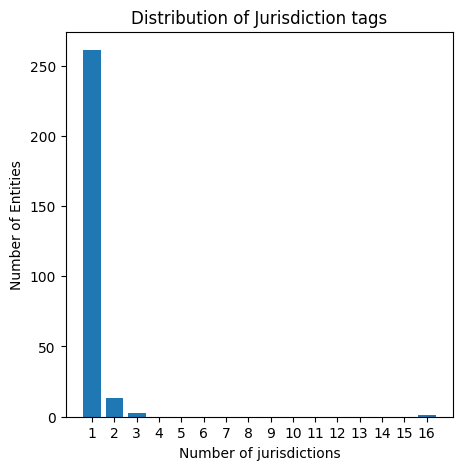

jurisdictions
1     261
2      13
3       3
16      1
Name: count, dtype: int64

In [12]:
# Compute the comma count for each value in the "jurisdictions" column
all_actors_in_flow_data = flows_df.src_id.value_counts().index.union(flows_df.dst_id.value_counts().index)
filtered_actors = actors_df[actors_df.id.str.lower().isin(all_actors_in_flow_data)]
comma_count_stats = filtered_actors['jurisdictions'].apply(lambda x: str(x).count(',')+1).value_counts().sort_index()

plt.figure(figsize=(5, 5)) 
plt.bar(comma_count_stats.index, comma_count_stats.values)
plt.xlabel('Number of jurisdictions')
plt.ylabel('Number of Entities')
plt.xticks(range(1, max(comma_count_stats.index) + 1), range(1, max(comma_count_stats.index) + 1))
plt.title('Distribution of Jurisdiction tags')
plt.show()

comma_count_stats

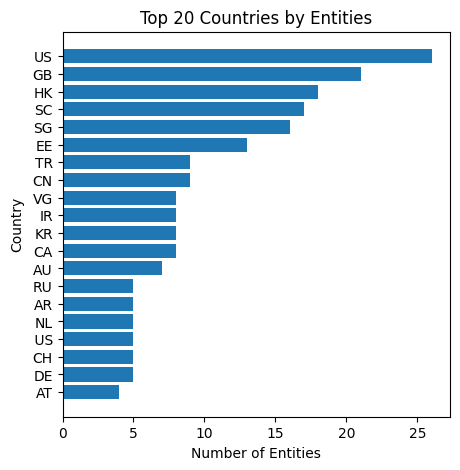

In [13]:
# Check distribution of jurisdictions
actors_jurisdictions = filtered_actors.assign(jurisdictions=filtered_actors.jurisdictions.str.split(','))
actors_jurisdictions = actors_jurisdictions.explode('jurisdictions')
jurisdiction_distribution = actors_jurisdictions.jurisdictions.value_counts().head(20)

plt.figure(figsize=(5, 5)) 
plt.barh(jurisdiction_distribution.index[::-1], jurisdiction_distribution.values[::-1])
plt.xlabel('Number of Entities')
plt.ylabel('Country')
#plt.xticks(range(1, 25), range(1, 25))
plt.title('Top 20 Countries by Entities')
plt.show()

who has 16 jurisdictions????

In [14]:
actors_df[actors_df['jurisdictions'].str.count(',') == 15]

,id,uri,label,jurisdictions,categories
35,binance,binance.com,"Binance (US, DEX)","AE, AU, BH, CA, CY, ES, FR, IT, KY, KZ, LT, MT...","defi_dex, exchange, mining_service, organization"


In [15]:
actors_df[actors_df['id'].str.contains("inance")== True]

,id,uri,label,jurisdictions,categories
35,binance,binance.com,"Binance (US, DEX)","AE, AU, BH, CA, CY, ES, FR, IT, KY, KZ, LT, MT...","defi_dex, exchange, mining_service, organization"


In which timeframe was the flow data collected?

In [16]:
# Flow data from - to
print(f'Flow data recorded from {flows_df.date.min()} to {flows_df.date.max()}')

Flow data recorded from 2011-05-13 to 2023-04-12


In [17]:
print(f'Flows before merging actor data {flows_df.shape[0]}')
merged_df = pd.merge(filtered_flows_df, actors_df.add_prefix('src_'), on='src_id', how='inner')
merged_df = pd.merge(merged_df, actors_df.add_prefix('dst_'), on='dst_id', how='inner')
print(f'Flows after merging actor data {merged_df.shape[0]}')
display(merged_df.head())

Flows before merging actor data 1939587
Flows after merging actor data 1677919


,src_id,dst_id,value_asset,value_USD,date,src_uri,src_label,src_jurisdictions,src_categories,dst_uri,dst_label,dst_jurisdictions,dst_categories
0,1coin,bitfinex,129990000,747.529257,2014-06-24,1coin.io,1Coin,"CA, US",exchange,bitfinex.com,Bitfinex,VG,exchange
1,1coin,bitfinex,546590000,3494.690488,2014-06-30,1coin.io,1Coin,"CA, US",exchange,bitfinex.com,Bitfinex,VG,exchange
2,allcrypt,bitfinex,1795821,11.070697,2014-05-30,www.allcrypt.com,Allcrypt,US,"exchange, service",bitfinex.com,Bitfinex,VG,exchange
3,allcrypt,bitfinex,3787360,22.271949,2014-06-16,www.allcrypt.com,Allcrypt,US,"exchange, service",bitfinex.com,Bitfinex,VG,exchange
4,allcrypt,bitfinex,4939000,29.067077,2014-06-20,www.allcrypt.com,Allcrypt,US,"exchange, service",bitfinex.com,Bitfinex,VG,exchange


In [18]:
# merge in btc course data
merged_df = pd.merge(merged_df,btc_price_data,on="date",how='inner')

In [19]:
# Types
merged_df['date'] = pd.to_datetime(merged_df['date'])

lets see how much of the traffic is from or to binance

In [20]:
# calc overall traffic per year
yearly = merged_df.groupby(["year"])["value_USD"].sum().reset_index()
yearly.rename(columns={"value_USD":"value_usd_with"},inplace=True)

yearly_without_binance = merged_df[merged_df["src_label"].str.contains("inance") == False]
yearly_without_binance = yearly_without_binance[yearly_without_binance["dst_label"].str.contains("inance") == False]

yearly["value_usd_without"] = yearly_without_binance.groupby(["year"])["value_USD"].sum().reset_index()["value_USD"]
yearly["binance portion"] = 1-(yearly["value_usd_without"]/yearly["value_usd_with"])

display(yearly)

,year,value_usd_with,value_usd_without,binance portion
0,2011,5.670567e+03,5.670567e+03,0.000000
1,2012,1.000773e+05,1.000773e+05,0.000000
2,2013,2.298649e+07,2.298649e+07,0.000000
3,2014,9.601529e+07,9.601529e+07,0.000000
4,2015,1.004441e+08,1.004441e+08,0.000000
5,2016,1.487341e+08,1.487341e+08,0.000000
6,2017,1.257284e+09,1.065114e+09,0.152846
7,2018,3.124788e+09,1.428452e+09,0.542864
8,2019,2.500138e+09,1.263970e+09,0.494440
9,2020,5.950352e+09,2.582169e+09,0.566048


In [21]:
# Transform jurisdiction string into list element
merged_df = merged_df.assign(src_jurisdictions=merged_df.src_jurisdictions.str.split(','))
merged_df = merged_df.assign(dst_jurisdictions=merged_df.dst_jurisdictions.str.split(','))
# Create year column
merged_df['year'] = merged_df.date.dt.year

display(merged_df.tail())

# Split up amounts by number of src and dst countries
merged_df['src_value_asset'] = merged_df.apply(lambda row: row['value_asset'] / len(row['src_jurisdictions']) if row['src_jurisdictions'] is not None else row['value_asset'], axis=1)
merged_df['dst_value_asset'] = merged_df.apply(lambda row: row['value_asset'] / len(row['dst_jurisdictions']) if row['dst_jurisdictions'] is not None else row['value_asset'], axis=1)
merged_df['src_value_USD'] = merged_df.apply(lambda row: row['value_USD'] / len(row['src_jurisdictions']) if row['src_jurisdictions'] is not None else row['value_USD'], axis=1)
merged_df['dst_value_USD'] = merged_df.apply(lambda row: row['value_USD'] / len(row['dst_jurisdictions']) if row['dst_jurisdictions'] is not None else row['value_USD'], axis=1)

# Create separate columns for each jurisdiction (if we want to split the amounts we have to split amount before)
merged_df = merged_df.explode('dst_jurisdictions')
merged_df = merged_df.explode('src_jurisdictions')

# Strip whitespace
merged_df.dst_jurisdictions = merged_df.dst_jurisdictions.str.strip()
merged_df.src_jurisdictions = merged_df.src_jurisdictions.str.strip()
# Remove flows which aren't x-border
merged_df = merged_df[merged_df['dst_jurisdictions'] != merged_df['src_jurisdictions']]

#display(merged_df.groupby(['year', 'dst_jurisdictions'])["open"].max())
# divide by btc value
# Do we really need this? Isn't value_asset already the number of tokens?
merged_df["value_BTC"] = merged_df["value_USD"] / merged_df["high"]

# Group by year and juristicion
dst_amounts = merged_df.groupby(['year', 'dst_jurisdictions'])[['value_USD', 'dst_value_asset', 'dst_value_USD', 'value_BTC',"src_label","dst_label"]].sum().reset_index()
dst_amounts = dst_amounts.rename(columns={"dst_jurisdictions":"jurisdictions"})

src_amounts = merged_df.groupby(['year', 'src_jurisdictions'])[['value_USD', 'src_value_asset', 'src_value_USD', 'value_BTC',"src_label","dst_label"]].sum().reset_index()
src_amounts = src_amounts.rename(columns={"src_jurisdictions":"jurisdictions"})

display(dst_amounts)
display(src_amounts)

,src_id,dst_id,value_asset,value_USD,date,src_uri,src_label,src_jurisdictions,src_categories,dst_uri,dst_label,dst_jurisdictions,dst_categories,high,year
260686,bitcoinde,orderbook,297000000,40.264289,2012-12-11,bitcoin.de,bitcoin.de,[DE],exchange,orderbook.net,Orderbook,[US],exchange,13.181821,2012
260687,btce,cavirtex,743259999,43.587738,2011-09-11,btc-e.com,Btc-E,[AU],exchange,cavirtex.com,Cavirtex,[CA],exchange,5.951316,2011
260688,btce,cavirtex,7484000000,319.776358,2011-10-07,btc-e.com,Btc-E,[AU],exchange,cavirtex.com,Cavirtex,[CA],exchange,4.567777,2011
260689,btce,virwox,27320360,0.677518,2011-11-27,btc-e.com,Btc-E,[AU],exchange,virwox.com,Virwox,[AT],exchange,2.603560,2011
260690,cavirtex,bitcoinica,193000000,5.351890,2011-10-26,cavirtex.com,Cavirtex,[CA],exchange,www.bitcoinica.com,Bitcoinica,[NZ],exchange,2.873687,2011


,year,jurisdictions,value_USD,dst_value_asset,dst_value_USD,value_BTC,src_label,dst_label
0,2011,AT,3.304020e+02,1.049084e+10,3.304020e+02,96.264235,Btc-EBtc-EBtc-E,VirwoxVirwoxVirwox
1,2011,AU,1.213176e+03,3.726010e+10,1.213176e+03,368.918549,VircurexVircurexbitcoin.deBtccBtccCavirtexCavi...,Btc-EBtc-EBtc-EBtc-EBtc-EBtc-EBtc-EBtc-EBtc-E
2,2011,BZ,2.989268e+01,3.786952e+08,1.494634e+01,6.535206,Btc-E,Vircurex
3,2011,CA,4.165230e+02,1.049526e+10,4.165230e+02,94.021394,Btc-EBtc-EBtc-EBtc-E,CavirtexCavirtexCavirtexCavirtex
4,2011,CN,2.989268e+01,3.786952e+08,1.494634e+01,6.535206,Btc-E,Vircurex
...,...,...,...,...,...,...,...,...
515,2023,TW,6.800703e+06,2.523528e+10,6.800703e+06,267.257992,"Binance (US, DEX)Binance (US, DEX)Binance (US,...",Max MaicoinMax MaicoinMax MaicoinMax MaicoinMa...
516,2023,US,5.836787e+09,2.346929e+13,5.407022e+09,264263.182738,bitcoin.deBitforexBitGlobal (fka Bithumb)BitME...,"Binance (US, DEX)Binance (US, DEX)Binance (US,..."
517,2023,VG,1.846449e+07,6.962437e+10,1.846449e+07,723.116566,Crypto.comCrypto.comCrypto.comTradeOgreBinance...,LBankLBankLBankLBankBTSEBTSEBTSEBTSEBTSEBTSEBT...
518,2023,VN,2.856750e+04,1.189241e+08,2.856750e+04,1.269132,"Binance (US, DEX)Binance (US, DEX)Binance (US,...",VindaxVindaxVindaxVindaxVindaxVindaxVindaxVind...


,year,jurisdictions,value_USD,src_value_asset,src_value_USD,value_BTC,src_label,dst_label
0,2011,AT,2.778538e+03,7.049400e+10,2.778538e+03,609.227868,VirwoxVirwox,TheRockTradingBtcc
1,2011,AU,9.275158e+02,2.651036e+10,9.275158e+02,236.652345,Btc-EBtc-EBtc-EBtc-EBtc-EBtc-EBtc-EBtc-EBtc-EB...,BitstampBtccBitcoinicaBtccBtccVircurexVircurex...
2,2011,BZ,1.475024e+02,1.777049e+09,7.375118e+01,30.936785,VircurexVircurex,Btc-EBtc-E
3,2011,CA,5.101930e+01,1.701000e+09,5.101930e+01,14.056460,CavirtexCavirtexCavirtexCavirtexCavirtex,BitcoinicaBitcoinicaBtc-EBtc-EBitcoinica
4,2011,CN,1.475024e+02,1.777049e+09,7.375118e+01,30.936785,VircurexVircurex,Btc-EBtc-E
...,...,...,...,...,...,...,...,...
495,2023,TR,2.092071e+08,9.507812e+11,2.092071e+08,9927.581349,BtcTurk PROBtcTurk PROBtcTurk PROBtcTurk PROBt...,"HuobiBinance (US, DEX)Binance (US, DEX)Binance..."
496,2023,TW,7.017710e+07,2.893594e+11,7.017710e+07,2946.629933,Max MaicoinMax MaicoinMax MaicoinMax MaicoinMa...,"Binance (US, DEX)Binance (US, DEX)Binance (US,..."
497,2023,US,2.881331e+09,9.427129e+12,2.137831e+09,132634.727436,"Binance (US, DEX)Binance (US, DEX)CoinbaseBina...","BitstampCexCexHuobiHuobiHuobiBinance (US, DEX)..."
498,2023,VG,9.012389e+05,3.892722e+09,9.012389e+05,39.570855,BKEXBKEXBKEXBKEXBKEXBKEXBKEXBKEXBKEXBKEXBKEXBK...,"CoinbaseCoinbaseBinance (US, DEX)Binance (US, ..."


In [22]:
# Number of flows after merging and filtering for different locations
print(f'Number of rows in the flow dataset {merged_df.shape[0]}')

Number of rows in the flow dataset 940287


### Frequency of jurisidictions in the flow data

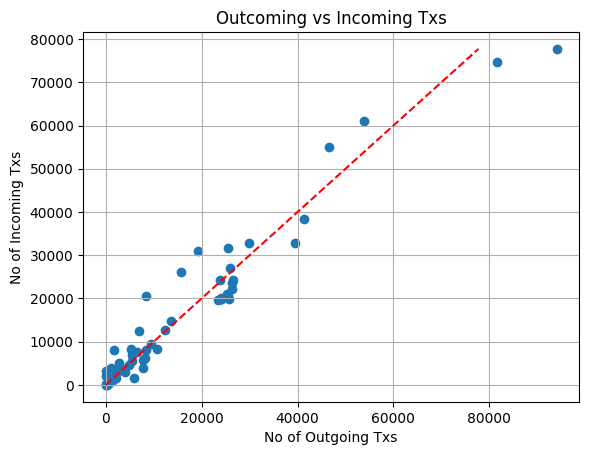

,count_x,count_y
US,94025,77722
SC,81644,74783
GB,53856,61082
SG,46615,54943
MT,41360,38324
KY,39465,32786
ZA,29884,32755
NZ,26569,24217
LT,26398,23684
IT,26375,22169


,count_x,count_y
US,94025,77722
SC,81644,74783
GB,53856,61082
SG,46615,54943
MT,41360,38324
KY,39465,32786
ZA,29884,32755
NZ,26569,24217
LT,26398,23684
IT,26375,22169


,count_x,count_y
US,94025,77722
SC,81644,74783
GB,53856,61082
SG,46615,54943
MT,41360,38324
KY,39465,32786
ZA,29884,32755
AU,25448,31672
HK,19348,31022
EE,25833,27112


src_jurisdictions
US    94025
SC    81644
GB    53856
SG    46615
MT    41360
KY    39465
ZA    29884
NZ    26569
LT    26398
IT    26375
Name: count, dtype: int64

dst_jurisdictions
US    77722
SC    74783
GB    61082
SG    54943
MT    38324
KY    32786
ZA    32755
AU    31672
HK    31022
EE    27112
Name: count, dtype: int64

PearsonRResult(statistic=0.9697416763335222, pvalue=3.2629509941146854e-37)

In [23]:
src_juri_freq = merged_df.src_jurisdictions.value_counts()
dst_juri_freq = merged_df.dst_jurisdictions.value_counts()
merged_freq = pd.merge(src_juri_freq, dst_juri_freq, left_index=True, right_index=True, how='inner')
plt.scatter(x=merged_freq.count_x, y=merged_freq.count_y)
plt.xlabel('No of Outgoing Txs')
plt.ylabel('No of Incoming Txs')
plt.title('Outcoming vs Incoming Txs')
plt.grid(True)
line = np.linspace(min(merged_freq.count_x), max(merged_freq.count_y), 100)
plt.plot(line, line, color='r', linestyle='--')
plt.savefig('distribute.png')
plt.show()

display(merged_freq)
display(merged_freq.sort_values(by='count_x', ascending=False))
display(merged_freq.sort_values(by='count_y', ascending=False))
display(src_juri_freq.head(10))
display(dst_juri_freq.head(10))

corr = pearsonr(merged_freq.count_x, merged_freq.count_y)
display(corr)


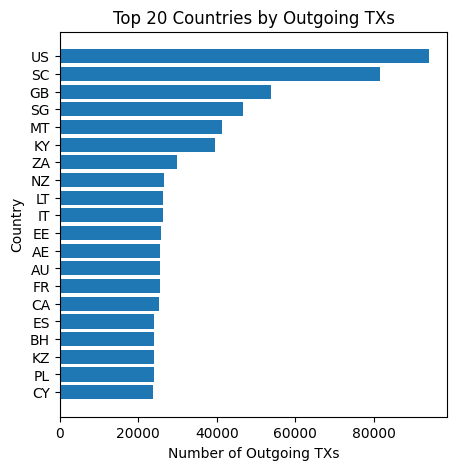

In [24]:
# Plot top 20 in terms of incoming tx
top20_src = src_juri_freq.head(20)
plt.figure(figsize=(5, 5)) 
plt.barh(top20_src.index[::-1], top20_src.values[::-1])
plt.xlabel('Number of Outgoing TXs')
plt.ylabel('Country')
#plt.xticks(range(1, 25), range(1, 25))
plt.title('Top 20 Countries by Outgoing TXs')
plt.savefig('outgoing_top20.png')
plt.show()

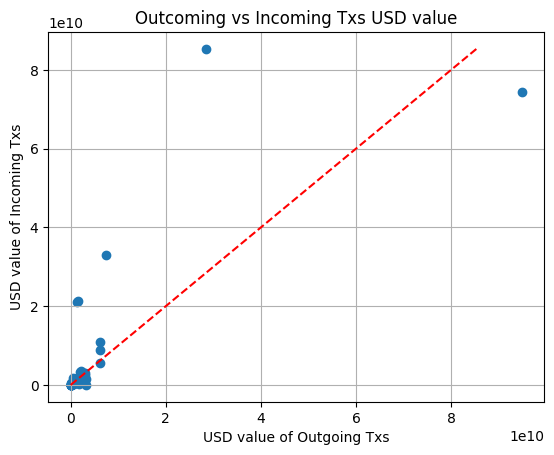

,src_value_USD,dst_value_USD
SC,9.482002e+10,7.447914e+10
US,2.842918e+10,8.531585e+10
AG,7.331077e+09,3.300634e+10
SG,6.176821e+09,8.753720e+09
TR,6.156611e+09,5.527607e+09
GB,6.070006e+09,1.100375e+10
TH,3.211617e+09,1.497691e+09
GE,3.182882e+09,1.430545e+07
NL,3.019320e+09,2.528661e+09
KY,2.911507e+09,2.999195e+09


,src_value_USD,dst_value_USD
US,2.842918e+10,8.531585e+10
SC,9.482002e+10,7.447914e+10
AG,7.331077e+09,3.300634e+10
KR,1.457821e+09,2.122373e+10
ID,1.254590e+09,2.103947e+10
GB,6.070006e+09,1.100375e+10
SG,6.176821e+09,8.753720e+09
TR,6.156611e+09,5.527607e+09
ZA,2.223561e+09,3.410309e+09
PA,2.056461e+09,3.263746e+09


PearsonRResult(statistic=0.7967756036011377, pvalue=2.6580779898703255e-14)

In [25]:
# Total value of incoming / outgoing tx
src_juri_sum = merged_df.groupby('src_jurisdictions')['src_value_USD'].sum()
dst_juri_sum = merged_df.groupby('dst_jurisdictions')['dst_value_USD'].sum()
merged_sum = pd.merge(src_juri_sum, dst_juri_sum, left_index=True, right_index=True, how='inner')
fig, ax = plt.subplots()
scatter = ax.scatter(x=merged_sum.src_value_USD, y=merged_sum.dst_value_USD)
plt.xlabel('USD value of Outgoing Txs')
plt.ylabel('USD value of Incoming Txs')
plt.title('Outcoming vs Incoming Txs USD value')
plt.grid(True)

line = np.linspace(min(merged_sum.src_value_USD), max(merged_sum.dst_value_USD), 100)
plt.plot(line, line, color='r', linestyle='--')
plt.show()

display(merged_sum.sort_values(by='src_value_USD', ascending=False))
display(merged_sum.sort_values(by='dst_value_USD', ascending=False))

corr = pearsonr(merged_sum.src_value_USD, merged_sum.dst_value_USD)
display(corr)

### Trading Pairs frequency

<Axes: ylabel='trading_pairs'>

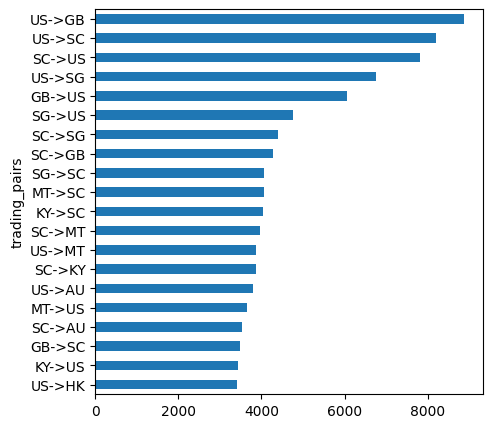

In [26]:
merged_df['trading_pairs'] = merged_df['src_jurisdictions'] + '->' + merged_df['dst_jurisdictions']

merged_df.trading_pairs.value_counts().head(20)[::-1].plot.barh(figsize=(5, 5))

In [27]:
display(merged_df)

,src_id,dst_id,value_asset,value_USD,date,src_uri,src_label,src_jurisdictions,src_categories,dst_uri,...,dst_jurisdictions,dst_categories,high,year,src_value_asset,dst_value_asset,src_value_USD,dst_value_USD,value_BTC,trading_pairs
0,allcrypt,bitfinex,1795821,11.070697,2014-05-30,www.allcrypt.com,Allcrypt,US,"exchange, service",bitfinex.com,...,VG,exchange,453.747621,2014,1.795821e+06,1.795821e+06,11.070697,11.070697,0.024398,US->VG
1,bitcoinde,bitfinex,100430551,619.124204,2014-05-30,bitcoin.de,bitcoin.de,DE,exchange,bitfinex.com,...,VG,exchange,453.747621,2014,1.004306e+08,1.004306e+08,619.124204,619.124204,1.364468,DE->VG
2,bitstamp,bitfinex,17360911415,107024.803758,2014-05-30,bitstamp.net,Bitstamp,GB,exchange,bitfinex.com,...,VG,exchange,453.747621,2014,1.736091e+10,1.736091e+10,107024.803758,107024.803758,235.868573,GB->VG
3,cryptsy,bitfinex,1856582045,11445.270790,2014-05-30,cryptsy.com,Cryptsy,US,exchange,bitfinex.com,...,VG,exchange,453.747621,2014,1.856582e+09,1.856582e+09,11445.270790,11445.270790,25.223870,US->VG
4,huobi,bitfinex,96001090000,591817.900933,2014-05-30,huobi.com,Huobi,SC,"exchange, mining_service, organization",bitfinex.com,...,VG,exchange,453.747621,2014,9.600109e+10,9.600109e+10,591817.900933,591817.900933,1304.288713,SC->VG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260686,bitcoinde,orderbook,297000000,40.264289,2012-12-11,bitcoin.de,bitcoin.de,DE,exchange,orderbook.net,...,US,exchange,13.181821,2012,2.970000e+08,2.970000e+08,40.264289,40.264289,3.054532,DE->US
260687,btce,cavirtex,743259999,43.587738,2011-09-11,btc-e.com,Btc-E,AU,exchange,cavirtex.com,...,CA,exchange,5.951316,2011,7.432600e+08,7.432600e+08,43.587738,43.587738,7.324050,AU->CA
260688,btce,cavirtex,7484000000,319.776358,2011-10-07,btc-e.com,Btc-E,AU,exchange,cavirtex.com,...,CA,exchange,4.567777,2011,7.484000e+09,7.484000e+09,319.776358,319.776358,70.007006,AU->CA
260689,btce,virwox,27320360,0.677518,2011-11-27,btc-e.com,Btc-E,AU,exchange,virwox.com,...,AT,exchange,2.603560,2011,2.732036e+07,2.732036e+07,0.677518,0.677518,0.260227,AU->AT


In [39]:
pairs = merged_df.copy()
grouped_df = pairs.groupby(['src_jurisdictions', 'dst_jurisdictions'])['value_USD'].sum()
src_countries = list(grouped_df.index.get_level_values(0).unique())
dst_countries = list(grouped_df.index.get_level_values(1).unique())
all_countries = list(set(src_countries + dst_countries))

countries_index = {}
for i, country in enumerate(all_countries):
    countries_index[country] = i

sources = []
target = []
values = []
for element in grouped_df.index:
    src = element[0]
    dst = element[1]
    value = grouped_df[element]
    
    #if value > 5000000000:
    if src == 'US' and value > 10000000:
        sources.append(countries_index[src])
        target.append(countries_index[dst] + len(countries_index))
        values.append(value)

print(len(values))
# Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = all_countries + all_countries,
      color = "blue"
    ),
    link = dict(
      source = sources, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = target,
      value = values
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

38


# Correlations

In [ ]:
# Prepare tax haven data
cthi_country = pd.merge(cthi, country_codes, left_on='Country', right_on='name', how='inner')

In [ ]:
# CTHI (Tax Haven Score)
flow_data = merged_df.copy()
dst_juri_sum = merged_df.groupby('dst_jurisdictions')['dst_value_USD'].sum()
receivers_cthi = pd.merge(dst_juri_sum, cthi_country, left_on='dst_jurisdictions', right_on='alpha-2', how='inner')

fig, ax = plt.subplots()
scatter = ax.scatter(x=np.log10(receivers_cthi.dst_value_USD), y=receivers_cthi['Haven Score'])
plt.xlabel('Received USD')
plt.ylabel('CTHI')
plt.title('CTHI / Received USD')
plt.grid(True)
corr = pearsonr(receivers_cthi.dst_value_USD, receivers_cthi['Haven Score'])
display(corr)

corr = spearmanr(receivers_cthi.dst_value_USD, receivers_cthi['Haven Score'])
display(corr)


In [ ]:
# Prepare CPI
cpi_country = pd.merge(cpi, country_codes, left_on='Country', right_on='name', how='inner')

In [ ]:
flow_data = merged_df.copy()
dst_juri_sum = merged_df.groupby('dst_jurisdictions')['dst_value_USD'].sum()
receivers_cpi = pd.merge(dst_juri_sum, cpi_country, left_on='dst_jurisdictions', right_on='alpha-2', how='inner')

fig, ax = plt.subplots()
scatter = ax.scatter(x=np.log10(receivers_cpi.dst_value_USD), y=receivers_cpi['CPI Score'])
plt.xlabel('Received USD')
plt.ylabel('CPI')
plt.title('CPI / Received USD')
plt.grid(True)

corr = pearsonr(receivers_cpi.dst_value_USD, receivers_cpi['CPI Score'])
display(corr)
corr = spearmanr(receivers_cpi.dst_value_USD, receivers_cpi['CPI Score'])
display(corr)

In [ ]:
# Prepare GDP
gdp_country = pd.merge(gdp, country_codes, left_on='Country Code', right_on='alpha-3', how='inner')

In [ ]:
flow_data = merged_df.copy()
dst_juri_sum = merged_df.groupby('dst_jurisdictions')['dst_value_USD'].sum()
receivers_gdp = pd.merge(dst_juri_sum, gdp_country, left_on='dst_jurisdictions', right_on='alpha-2', how='inner')
receivers_gdp = receivers_gdp.dropna(subset=['2021'])

fig, ax = plt.subplots()
scatter = ax.scatter(x=np.log10(receivers_gdp.dst_value_USD), y=np.log10(receivers_gdp['2021']))
plt.xlabel('Received USD')
plt.ylabel('GDP')
plt.title('GDP / Received USD')
plt.grid(True)

corr = pearsonr(population_gdp.dst_value_USD, population_gdp['2021'])
display(corr)
corr = spearmanr(population_gdp.dst_value_USD, population_gdp['2021'])
display(corr)

In [ ]:
# Prepare Population
population_country = pd.merge(population, country_codes, left_on='Country Code', right_on='alpha-3', how='inner')

In [ ]:
flow_data = merged_df.copy()
dst_juri_sum = merged_df.groupby('dst_jurisdictions')['dst_value_USD'].sum()
population_gdp = pd.merge(dst_juri_sum, population_country, left_on='dst_jurisdictions', right_on='alpha-2', how='inner')

fig, ax = plt.subplots()
scatter = ax.scatter(x=np.log10(population_gdp.dst_value_USD), y=population_gdp['2021'])
plt.xlabel('Received USD')
plt.ylabel('Population')
plt.title('Population / Received USD')
plt.grid(True)

corr = pearsonr(population_gdp.dst_value_USD, population_gdp['2021'])
display(corr)
corr = spearmanr(population_gdp.dst_value_USD, population_gdp['2021'])
display(corr)

In [ ]:
gdp_country['2021']

### How does the general trend look like?

In [ ]:
def test_plot(flow_data, btc_data):
    _flow_data = flow_data.groupby('year')["src_value_USD"].sum()/1000000000
    _btc_data = btc_data.groupby('year')["high"].max()

    fig, ax1 = plt.subplots()

    # Plotting the bar plot
    ax1.plot(_flow_data.index, _flow_data.values, color='blue',marker="x",linestyle="dashdot",label="USD FLOW")
    ax1.set_ylabel('Flow Values [MRD USD]')
    ax2 = ax1.twinx()

    # Plotting the line plot
    ax2.plot(_flow_data.index, _btc_data.values, color='red', marker='o', linestyle="dashed",label="BTC MARKET VALUE (YEARLY HIGH)")
    ax2.set_ylabel('BTC YEARLY HIGH [USD]')
    ax1.set_xlabel('Years')
    fig.legend(loc='upper left',ncol=1)

    #plt.tight_layout()

test_plot(src_amounts, btc_price_data)
#test_plot(dst_amounts)

looks like Flow value and the BTC market value correlate - does that mean that the amount of BTC flowing (=flow value/ btc market value) is constant? Lets see

In [ ]:
def test_plot2(flow_data,btc_data):
    # TODO: can we use the assets or should we use BTC_value?
    _flow_data = flow_data.groupby('year')["src_value_asset"].sum()/1000000
    _btc_data = btc_data.groupby('year')["high"].max()

    fig, ax1 = plt.subplots()

    # Plotting the bar plot
    ax1.plot(_flow_data.index, _flow_data.values, color='blue',marker="x",linestyle="dashdot",label="BTC FLOW")
    ax1.set_ylabel('Flow Values [MIO BTC]')
    ax2 = ax1.twinx()

    # Plotting the line plot
    ax2.plot(_flow_data.index, _btc_data.values, color='red', marker='o', linestyle="dashed",label="BTC MARKET VALUE (YEARLY HIGH)")
    ax2.set_ylabel('BTC YEARLY HIGH [USD]')
    ax1.set_xlabel('Years')
    fig.legend(loc='upper left',ncol=1)

test_plot2(src_amounts,btc_price_data)

how are the flows distributed over the jurisdictions?

In [ ]:
def plot_juri_bars(data1,data2,l1,l2,year,label):
    #x = dst_amounts["jurisdictions"].unique()
    data1 = data1.sort_values("jurisdictions",ascending=False)
    filtered_data1 = [d for d in zip(data1['year'],data1['jurisdictions'], data1['src_value_USD']/1000000000) if d[0] == year]

    data2 = data2.sort_values("jurisdictions",ascending=False)
    filtered_data2 = [d for d in zip(data2['year'],data2['jurisdictions'], data2['dst_value_USD']/1000000000) if d[0] == year]

    #display(filtered_data)
    # Separate the x and y values
    x1 = [d[1] for d in filtered_data1]
    y1 = [d[2] for d in filtered_data1]

    x2 = [d[1] for d in filtered_data2]
    y2 = [d[2] for d in filtered_data2]

    fig, (ax1,ax2)= plt.subplots(2,1,figsize=(10,5))

    # Plot the bar chart
    ax1.bar(x1, y1)
    # Set labels and title
    ax1.set_xlabel('Jurisdictions')
    ax1.set_ylabel(f'{l1} Value (MRD USD)')

    # Plot the bar chart
    ax2.bar(x2, y2)
    # Set labels and title
    ax2.set_xlabel('Jurisdictions')
    ax2.set_ylabel(f'{l2} Value (MRD USD)')

    # Rotate x-axis labels for better visibility
    ax1.tick_params(axis='x', rotation=90)
    ax2.tick_params(axis='x', rotation=90)

    # Add a label to the plot
    plt.suptitle(label, fontsize=14)

   
    # Display the plot
    plt.show()

interact(plot_juri_bars,data1=fixed(src_amounts),data2=fixed(dst_amounts),l1=fixed("Source"),l2=fixed("Destination"),year=(2012,2022,1),label=fixed("Yearly flow values by jursidictions"))

they are all prettymuch "the same" - maybe because binance is in just those juris? lets see

In [ ]:
src_filterd = src_amounts[src_amounts["src_label"].str.contains("inance") == False]
src_filterd = src_filterd[src_filterd["dst_label"].str.contains("inance") == False]

dst_filterd = dst_amounts[dst_amounts["src_label"].str.contains("inance") == False]
dst_filterd = dst_filterd[dst_filterd["dst_label"].str.contains("inance") == False]


interact(plot_juri_bars,data1=fixed(src_filterd),data2=fixed(dst_filterd),l1=fixed("Source"),l2=fixed("Destination"),year=(2012,2022,1),label=fixed("Yearly flow values by jursidictions without binance"))

In [ ]:
result = src_amounts.copy()
result['value_USD'] = src_amounts['src_value_USD'].sub(dst_amounts['dst_value_USD'], axis=0)
#interact(plot_juri_bars,data1=fixed(result),data2=fixed(result),l1=fixed("Source"),l2=fixed("Destination"),year=(2012,2022,1),label=fixed("Holdings by jurisdictions in"))

In [ ]:
result = src_amounts.copy()
result['value_USD'] = dst_amounts['dst_value_USD'].sub(src_amounts['src_value_USD'], axis=0)

result = result.groupby(['jurisdictions'])['value_USD'].sum().reset_index()
result = result.sort_values("jurisdictions",ascending=True)
result["value_USD"] = result["value_USD"] / 10**9

plt.figure(figsize=(10, 5))

# Plot the bar chart
bars = plt.bar(result['jurisdictions'], result['value_USD'])

# Set labels and title
plt.xlabel('Jurisdictions')
plt.ylabel('Value (MRD USD)')
plt.title('Aggregated net flows by jurisdictions')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Color the bars based on a condition
for bar, value in zip(bars, result['value_USD']):
    if value < 0:
        bar.set_color('red')
    else:
        bar.set_color('blue')

# Display the plot
plt.show()
display(result)

In [ ]:
def plot_net_flows_by_year(src_amounts,dst_amounts,year):
    y_result = src_amounts[src_amounts['year'] == year]
    y_result['value_USD'] = dst_amounts['dst_value_USD'].sub(src_amounts['src_value_USD'], axis=0)

    y_result = y_result.groupby(['jurisdictions'])['value_USD'].sum().reset_index()
    y_result = y_result.sort_values("jurisdictions",ascending=True)
    y_result["value_USD"] = y_result["value_USD"] / 10**9
    
    plt.figure(figsize=(10, 5))

    # Plot the bar chart
    bars = plt.bar(y_result['jurisdictions'], y_result['value_USD'])

    # Set labels and title
    plt.xlabel('Jurisdictions')
    plt.ylabel('Value (MRD USD)')
    plt.title('Aggregated net flows by jurisdictions ')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=90)
    plt.grid(True)

    # Color the bars based on a condition
    for bar, value in zip(bars, y_result['value_USD']):
        if value < 0:
            bar.set_color('red')
        else:
            bar.set_color('blue')

    # Display the plot
    plt.show()

interact(plot_net_flows_by_year,src_amounts=fixed(src_amounts),dst_amounts=fixed(dst_amounts),year=(2012,2022,1))

## What do the flows look like on a map?

In [ ]:
display(result)
result.rename(columns={'jurisdictions':'alpha-2'},inplace=True)
country_codes = pd.read_csv('data/country_codes.csv')
country_codes = country_codes[['alpha-2','alpha-3']]
c_merged_df= pd.merge(result, country_codes,on='alpha-2',how='inner')
c_merged_df.rename(columns={'alpha-2':'ISO'},inplace=True)

map_data = gpd.read_file('shapefile/World_Countries__Generalized_.shp')

c_merged_data = map_data.merge(c_merged_df, on='ISO')
fig, ax = plt.subplots(figsize=(10, 8))

c_merged_data.plot(column='value_USD', cmap='seismic_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Holdings')
plt.xticks([])
plt.yticks([])
plt.title('Aggregated net flows by jurisdictions (in BN USD)')
plt.show()

In [ ]:
# TODO: Merge with GDP Data
# Merge country codes first
print(f'Dest Rows before merge: {dst_amounts.shape[0]}')
dst = pd.merge(dst_amounts, country_codes[['alpha-2', 'alpha-3', 'region', 'sub-region']], left_on='dst_jurisdictions', right_on='alpha-2', how='left')

print(f'Src rows before merge: {src_amounts.shape[0]}')
src = pd.merge(src_amounts, country_codes[['alpha-2', 'alpha-3', 'region', 'sub-region']], left_on='src_jurisdictions', right_on='alpha-2', how='inner')
#display(src.head())

# Now merge gdp data
dst = pd.merge(dst, gdp, left_on='alpha-3', right_on='Country Code', how='left')
print(f'Dest rows after merge: {dst.shape[0]}')

src = pd.merge(src, gdp, left_on='alpha-3', right_on='Country Code', how='inner')
print(f'Src rows after merge: {src.shape[0]}')

print(display(dst[dst['alpha-3'].isna()]))